# Funciones de Costo
Las funciones de costo a veces las llaman (de acuerdo a la comunidad), funciones objetivo (target),  de perdida (loss function), tambien **obective functions**.

En ciertas instancias son tambien funciones de error. Por que error es lo queremos  minimizar. Sin embargo las funciones de costo se usan para optimizacion y el error se puede medir con distintas metricas, no necesariamente, la funcion de costo.

Hay dos tipos importantes de funciones de costo:
* continuas. Se usan en regresion lineal (ML)
Un ejemplo de estas es MLE: Mean Square Error.
* discretas. Se usan para clasificacion (ML). Por ejemplo binaria. Estimar si una imagen es de un gato o un perro (1,0 o Falso, Verdadero, o -1, 1). O
Un ejemplo es cross-entropy loss.
Multiclase: gato, perro o cerdo. O clasificar 1 de 10 digitos:0,1,2,3,4,5,6, 7,8,9. Vamos a ver laboratorioes en ML.
Un ejemplo de esta ultima es categorical cross-entropy loss.







Este tema se ve con mas detalle en el curso de ML, pero "a vuelo de pajaro" veremos algunas cosas de esto aca.

## MSL: Mean Square Error (error de minimos cuadrados).
Se usa en regresion lineal (ML).

$$C(\theta) = \frac1m \sum_{i=1}^m (h(\theta, x_i) - y_i)^2 + \frac{\lambda}{2 n} \sum_{i=1}^n \theta_i^2 .$$
Se usa para regresion lineal donde $h(\theta,x)=x_i^T \theta$, $i=1,2, \cdots, m$.
Se puede usar esta funcion de costo tambien para clasificacion binaria usando la funcion de activacion **sigmoid logistic activation function**

$$ h(\theta, x_i) = \frac{1}{1 + \exp (- x_i^T \theta)}.$$
Los detalles acerca del origen y funcionamiento de esta funcion en el curso de ML.

## Cross entropy loss (perdida de entropia cruzada)
La formula para esto, probada en el curso de ML (la proxima semana) es

$$C(\theta) = -\frac1m \sum_{i=1}^m y_i \log[h(\theta, x^{(i)})] + (1- y_i) \log [ 1 - h(\theta, x^{(i)}] + \frac{\lambda}{2n} \sum_{j=1}^n \theta_j^2 \tag{1} .$$


Es es para clasificacion binaria. $y_i=0$, o $y_i=1$, $i=1, \cdots, m$.
Algunas veces esta funcion tambien se conoco como **logistic loss** o **log loss**.

## Categorical Cross-Entropy loss
Aca presentamos la posibilidad de mas de dos valores de etiquetas. Por ejemplo, perros, gatos, y cerdos. Como extendemos la funcion de perdida (1) para este caso, o otro mas general.
La idea es ya usar etiquetas **vectoriales** (no escalares)
por ejemplo

\begin{eqnarray}
\text{gato} = \begin{pmatrix} 1 \\ 0 \\ 0  \end{pmatrix}
\quad \text{perro} = \begin{pmatrix} 0 \\ 1 \\ 0  \end{pmatrix}
\quad \text{cerdo} = \begin{pmatrix} 0 \\ 0 \\ 1  \end{pmatrix}
\end{eqnarray}

La funcion de perdida, extension de (1).
$$ C(\theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^{K} y_i^{(k)} \log[h_k(\theta, x_i)] + (1 - y_i^{(k)}) \log [ 1 - h_k(\theta, x_i)] + \frac{\lambda}{2n}  \sum_{j=1}^n \theta_j^2.$$


Los detalles los veremos en el curso de ML

En los ejemplos anteriores hay $K$ categorias.
Por ultimo veamos la **softmax activation function**.


\begin{eqnarray}
\sigma: \mathbb{R}^K &\to& [0,1]^{K} \\
(z_i) &\mapsto& \sigma(z)_i = \frac{\exp(z_i)}{\sum_{j=1}^k \exp(z_j)} \quad , \quad i=1,2, \cdots, K, \quad  z_i \in \mathbb{R}
\end{eqnarray}
Esta funcion de **activacion** funciona como una funcion de probabilidad. Esta en el intervalo $[0,1]$ , es monotona creciente y la suma de todas da 1.
Con esta funcion de activacion podemos definir la hipotesis

\begin{eqnarray}
h(\theta, x) =
\begin{pmatrix}
P( y=1 | x; \theta) \\
P( y=2 | x; \theta) \\
\vdots \\
P( y=K | x; \theta) \\
\end{pmatrix}
=
\begin{pmatrix}
\sigma(z_1) \\
\sigma(z_2) \\
\vdots  \\
\sigma(z_K) \\
\end{pmatrix}
= \frac{1}{\sum_{k=1}^K \exp( (\theta_j)^T x)}
\begin{pmatrix}
\exp ( {\theta^{(1)}}^T x) \\
\exp ( {\theta^{(2)}}^T x) \\
\vdots \\
\exp ( {\theta^{(K)}}^T x) \\
\end{pmatrix}
\end{eqnarray}
donde $z_i= {\theta^{(i)}}^T x$, $i=1,2, \cdots, K$.

Esta hipotesis se puede hallar usando los siguientes pasos.
* Escribir la probabilidad multidimensional para cada muestra
* Escribir la funcion de **versimilitud** (likelihood. Lo vemos en el curso de ML), que debe ser maximizada sobre un doble producto de muestras y classes.
* Tomar el logaritmo de la funcion en el articulo anterior.
* Cambiar el signo para que la funcion sea convexa y la podamos minizar.
Con esto llevgamos a la **softmax regression** dada por


$$C(\theta) =- \left [ \sum_{i=1}^m \sum_{k=1}^K \mathbb{1}\{y^{(i)} = k\}  \log \frac{\exp \left ( {\theta^{(k)}}^T x^{(i)}   \right )}{\sum_{j=1}^K
\exp \left ({\theta^{(j)}}^T   
\right )}\right ] . $$
donde la funcion indicadora $\mathbb{1}$ esta dada por


\begin{eqnarray}
\mathbb{1}(x) = \left \{
    \begin{array}{cc}
    1 & \text{si } x \quad \text{es cierto} \\
    0 & \text{si } x \quad \text{es falso}
    \end{array}
    \right .
\end{eqnarray}

Hay un ejercicio al final de las notas (no para usted) acerca de calcular el gradiente de esta funcion.
\begin{eqnarray}
\nabla C(\theta^{(k)}) = - \sum_{i=1}^m
\left [ x^{(i)} \left (  \mathbb{1} \{ y^{(i)} = k  \}
- P( y^{(i)} = k | x^{(i)}; \theta^{(k)})
    \right )
\right ]
\end{eqnarray}
con

$$  P( y^{(i)} = k | x^{(i)}; \theta^{(k)}) = \log \frac{\mathrm{e}^{z_k}}{\sum_{j=1}^K \mathrm{e}^{z_{jk}}} .$$
donde $z_{ik}= {\theta^{(k)}}^T x^{(i)}  .$

Aun se puede extender mas los algorimos de clasificacion multiclase, teniendo en cuenta que varias clases pueden aparecer simultanamente en el mismo grupo. Por ejemplo.











\begin{eqnarray}
\text{perros y gatos} = \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix} \quad , \quad
\text{gatos y cerdos} = \begin{pmatrix} 0 \\ 1 \\ 1 \end{pmatrix} \quad , \quad
\text{perros y cerdos} = \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix} \quad , \quad
\end{eqnarray}
Ojo que ya esto implica un manejo mas cuidados de las probilidades por no haber independencia estadistica.



# Redes Neuronales Artificales (ANN: Artifical Neural Networks).
Los grandes algorimos de ML son basados en ANN (por ejemplo ChatGPT).
Una motivacion, que muestro en el curso de ML, es que si quisieramos hacer una regresion logistica sobre imagenes para clasficar categorias, podriamos, en un experimento donde las variables no son muy grandes necesitar hasta $20^{22}$ floats.
Usando ANN el tamano se reduce mucho. Esto motiva a usar ANN.


Las redes  neuronales resuelven un problema jigantesco llamado
[Universal Approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem).
Basicamente, que con redes neuronales podemos aproximar culquier funcion (decente) $f: \mathbb{R}^n \to \mathbb{R}^m$, tanto como queramos. Por decentes nos referimos a funciones integrables "Bochner-Lebesgue integrable" . En la practica de la ingenieria todas caben. Que se necesita para esta aproximacion? Se necesita una red neuronal (profunda) de profundidad $d=\max \{n+1, m \}$ donde $d$ el numero de capas. No hemos definido que son capas de una red neuronal. Esto sigue.





## El Perceptron.
Es un algoritmo publicado en 1958 en el Cornell Aeronautical Laboratory, por Frank Rosenblatt. Es un sicologo "gringo".

Para motivar el trabajo de Roseenblatt, piense que usted quiere ir a un viaje. Usted necesita varios parametros. Por ejemplo

Estos son datos (la matriz $x$)
* Distancia al lugar de destino
* Modo de viaje, a pie, en carro, avion, barco, bicicleta, etc.
* Clima y humedad a donde va.
* Costo, transporte, hotel y comida.

De otro lado usted tiene sus caprichos

Parametros
* Que tan lejos de casa quiere irse? (entre 0, 1)
* Que tanto puede caminar largas distancia?
* Que tan bueno es usted para el clima frio?
* Que tanta plata tiene?

Al final usted va o no es un **promedio ponderado** de los datos datos que tiene con los gustos. De las dos listas.

Mas o menos asi trabaja el **perceptron**






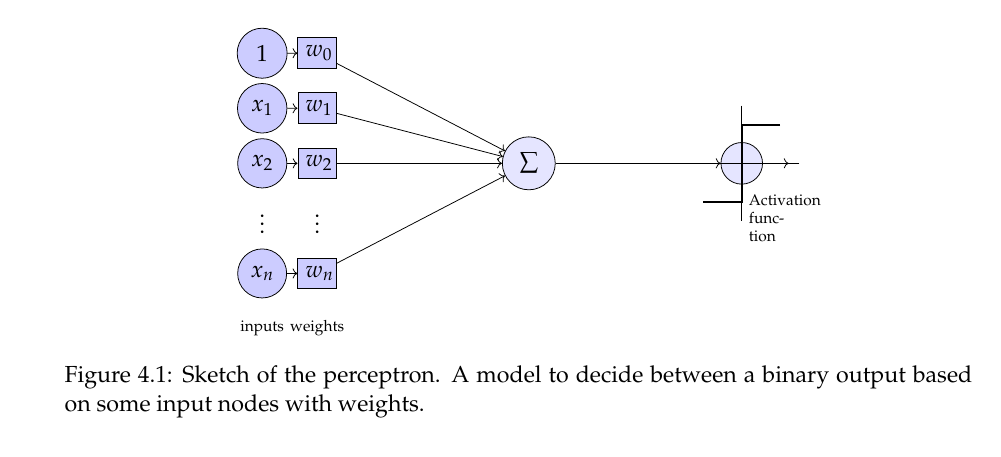

# Proxima clase: MLP: Multilayer Perceptron